In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [2]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [3]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
movie_reviews["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
movie_reviews=movie_reviews.sample(10000)
movie_reviews.shape

(10000, 2)

In [6]:
movie_reviews

,review,sentiment
33132,If you're a fan of film noir and think they do...,positive
13901,A Cryptozoologist captures a mythical chupacab...,negative
46195,It is a movie which sheds the light on the beg...,negative
15589,Students often ask me why I choose this versio...,positive
48992,This is a re-imagining of Tarzan in the era of...,negative
...,...,...
27565,"Always enjoy the Classic Horror films, however...",negative
47401,Most people will consider that Yul Brynner's g...,positive
45467,"I just have to add, in case anyone actually re...",negative
18294,"Overshadowed by ""Braveheart"" released the same...",positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

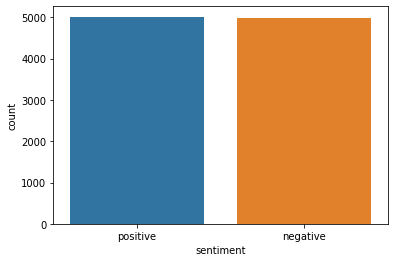

In [7]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

# Data Preprocessing

In [8]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [9]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [10]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [11]:
X[3]

'Students often ask me why choose this version of Othello Shakespeare text is strongly truncated and the film contains material which earned it an rating have several reasons for using this production First had not seen depiction of the Moor that actually made me sympathetic to Othello until saw Fishburne play him saw James Earl Jones and Christopher Plummer play Othello and Iago on Broadway and it was wonderful Plummer energy was especially noticeable But in spite of Jone incredible presence both physically and vocally the character he played just seemed too passive to illicit from me complete emotional purgation in the Aristotelian sense Jones in fact affirmed what felt when in an interview he noted that he had played Othello as passive seeing Iago as basically doing him over Unfortunately this sapped my grief for the character destruction Thus felt sympathy for Jone Moor but not the horror over his corruption by an evil man In contrast Fishburne Othello is strong and vigorous figure

In [12]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Embedding Layer

In [14]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [16]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [17]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [18]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [19]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

BernoulliNB()

In [20]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
Gaussian_accuracy=accuracy_score(y_test,y_pred1)
print('Gaussian',Gaussian_accuracy)
MultinomialNB_accuracy=accuracy_score(y_test,y_pred2)
print('MultinomialNB',MultinomialNB_accuracy)
BernoulliNB_accuracy=accuracy_score(y_test,y_pred3)
print('BernoulliNB',BernoulliNB_accuracy)


Gaussian 0.5285
MultinomialNB 0.518
BernoulliNB 0.5185


# Simple Neural Network

In [22]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          4704400   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 4,714,401
Trainable params: 10,001
Non-trainable params: 4,704,400
_________________________________________________________________
None


In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
50/50 [==============================] - 0s 8ms/step - loss: 0.6837 - acc: 0.5866 - val_loss: 0.6815 - val_acc: 0.6212
Epoch 2/6
50/50 [==============================] - 0s 4ms/step - loss: 0.5304 - acc: 0.7431 - val_loss: 0.6024 - val_acc: 0.6881
Epoch 3/6
50/50 [==============================] - 0s 4ms/step - loss: 0.4502 - acc: 0.8091 - val_loss: 0.5895 - val_acc: 0.7000
Epoch 4/6
50/50 [==============================] - 0s 4ms/step - loss: 0.4128 - acc: 0.8316 - val_loss: 0.5938 - val_acc: 0.6994
Epoch 5/6
50/50 [==============================] - 0s 4ms/step - loss: 0.3647 - acc: 0.8702 - val_loss: 0.5873 - val_acc: 0.7106
Epoch 6/6
50/50 [==============================] - 0s 4ms/step - loss: 0.3356 - acc: 0.8877 - val_loss: 0.5927 - val_acc: 0.7113


In [25]:
Simple_neural_network_accuracy = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 1ms/step - loss: 0.5965 - acc: 0.6905


# CNN

In [26]:
from keras.layers.convolutional import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          4704400   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,768,657
Trainable params: 64,257
Non-trainable params: 4,704,400
_________________________________________________________________
None


In [28]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
50/50 [==============================] - 3s 51ms/step - loss: 0.6561 - acc: 0.6158 - val_loss: 0.5639 - val_acc: 0.7431
Epoch 2/6
50/50 [==============================] - 2s 48ms/step - loss: 0.5022 - acc: 0.7823 - val_loss: 0.4968 - val_acc: 0.7819
Epoch 3/6
50/50 [==============================] - 2s 49ms/step - loss: 0.4178 - acc: 0.8373 - val_loss: 0.4571 - val_acc: 0.7931
Epoch 4/6
50/50 [==============================] - 2s 49ms/step - loss: 0.3619 - acc: 0.8647 - val_loss: 0.4314 - val_acc: 0.7962
Epoch 5/6
50/50 [==============================] - 2s 48ms/step - loss: 0.3211 - acc: 0.8880 - val_loss: 0.4208 - val_acc: 0.7981
Epoch 6/6
50/50 [==============================] - 2s 48ms/step - loss: 0.2838 - acc: 0.9072 - val_loss: 0.4159 - val_acc: 0.8012


In [29]:
CNN_accuracy = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 5ms/step - loss: 0.4288 - acc: 0.8180


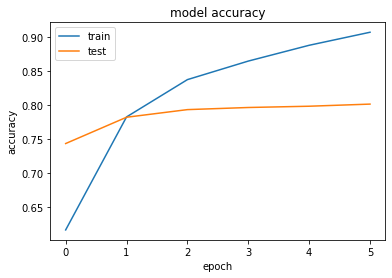

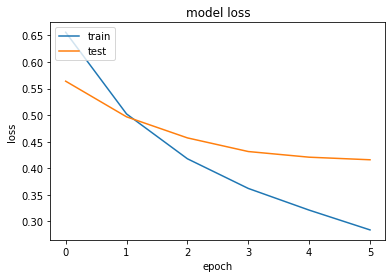

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Predict

In [31]:
instance = X[57]
print(instance)

I have been Mario fan for as long as can remember have very fond memories of playing Super Mario World as kid this game has brought back many of those memories while adding something new Super Mario Galaxy is the latest installment in the amazing Mario franchise There is much very different about this game from any other Mario before it while still keeping intact the greatest elements of Mario the first noticeable difference is that the story takes place in space The story begins much like any other Mario game Mario receives letter from Princess Peach inviting him to celebration at her castle in the Mushroom Kingdom Upon arriving at Peach castle Mario finds Bowser and his son Bowser Jr attacking the castle with their airships Bowser kidnaps Princess Peach and then lifts her castle up into space In the midst of the castle being lifted into space Mario falls off and lands on an unknown planet Mario is found by talking star named Luma and is taken back to the Luma home floating space stat

In [33]:
results=pd.DataFrame({
    "Model":['GaussianNB','MultinomialNB','BernoulliNB','Simple Neural Network','CNN'],
    'Score':[Gaussian_accuracy,MultinomialNB_accuracy,BernoulliNB_accuracy,Simple_neural_network_accuracy[1],CNN_accuracy[1]]
})
results

,Model,Score
0,GaussianNB,0.5285
1,MultinomialNB,0.5180
2,BernoulliNB,0.5185
3,Simple Neural Network,0.6905
4,CNN,0.8180
